In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data=pd.read_csv("/content/diabetes.csv")
print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [3]:
data_final=data.drop(['Pregnancies',"DiabetesPedigreeFunction"],axis=1)
print(data_final)

     Glucose  BloodPressure  SkinThickness  Insulin   BMI  Age  Outcome
0        148             72             35        0  33.6   50        1
1         85             66             29        0  26.6   31        0
2        183             64              0        0  23.3   32        1
3         89             66             23       94  28.1   21        0
4        137             40             35      168  43.1   33        1
..       ...            ...            ...      ...   ...  ...      ...
763      101             76             48      180  32.9   63        0
764      122             70             27        0  36.8   27        0
765      121             72             23      112  26.2   30        0
766      126             60              0        0  30.1   47        1
767       93             70             31        0  30.4   23        0

[768 rows x 7 columns]


<Axes: >

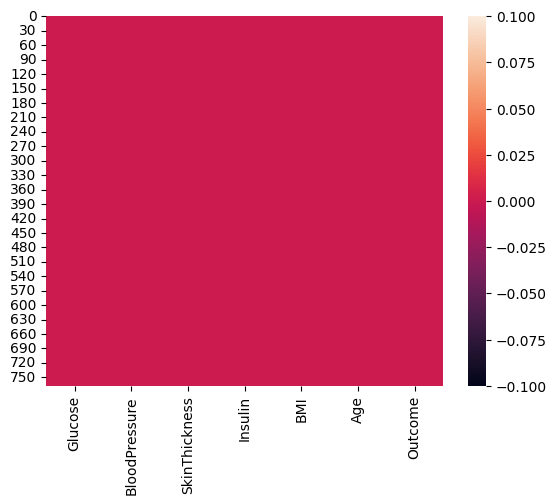

In [4]:
sns.heatmap(data_final.isnull())

In [5]:
data_final[[ 'Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age' ]]=data_final[[ 'Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age' ]].replace(0,np.nan)
print(data_final)

     Glucose  BloodPressure  SkinThickness  Insulin   BMI  Age  Outcome
0      148.0           72.0           35.0      NaN  33.6   50        1
1       85.0           66.0           29.0      NaN  26.6   31        0
2      183.0           64.0            NaN      NaN  23.3   32        1
3       89.0           66.0           23.0     94.0  28.1   21        0
4      137.0           40.0           35.0    168.0  43.1   33        1
..       ...            ...            ...      ...   ...  ...      ...
763    101.0           76.0           48.0    180.0  32.9   63        0
764    122.0           70.0           27.0      NaN  36.8   27        0
765    121.0           72.0           23.0    112.0  26.2   30        0
766    126.0           60.0            NaN      NaN  30.1   47        1
767     93.0           70.0           31.0      NaN  30.4   23        0

[768 rows x 7 columns]


<Axes: >

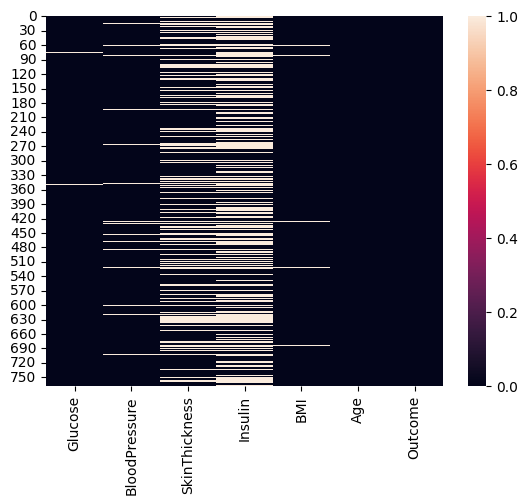

In [6]:
sns.heatmap(data_final.isnull())

In [7]:
data_final.fillna({'Glucose':data_final['Glucose'].mean()},inplace=True)
data_final.fillna({'BloodPressure':data_final['BloodPressure'].mean()},inplace=True)
data_final.fillna({'SkinThickness':data_final['SkinThickness'].mean()},inplace=True)
data_final.fillna({'Insulin':data_final['Insulin'].mean()},inplace=True)
data_final.fillna({'Age':data_final['Age'].mean()},inplace=True)
data_final.fillna({'BMI':data_final['BMI'].mean()},inplace=True)

<Axes: >

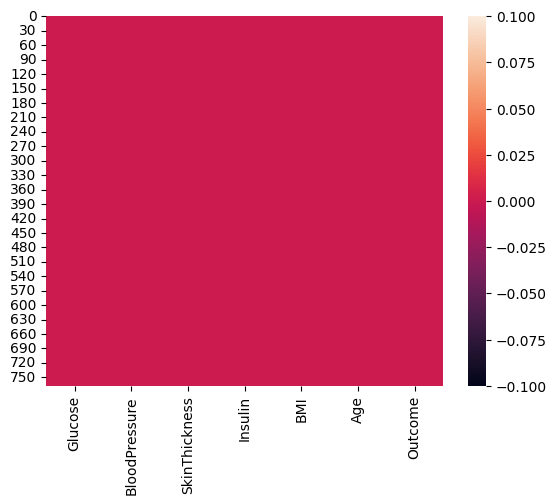

In [8]:
sns.heatmap(data_final.isnull())

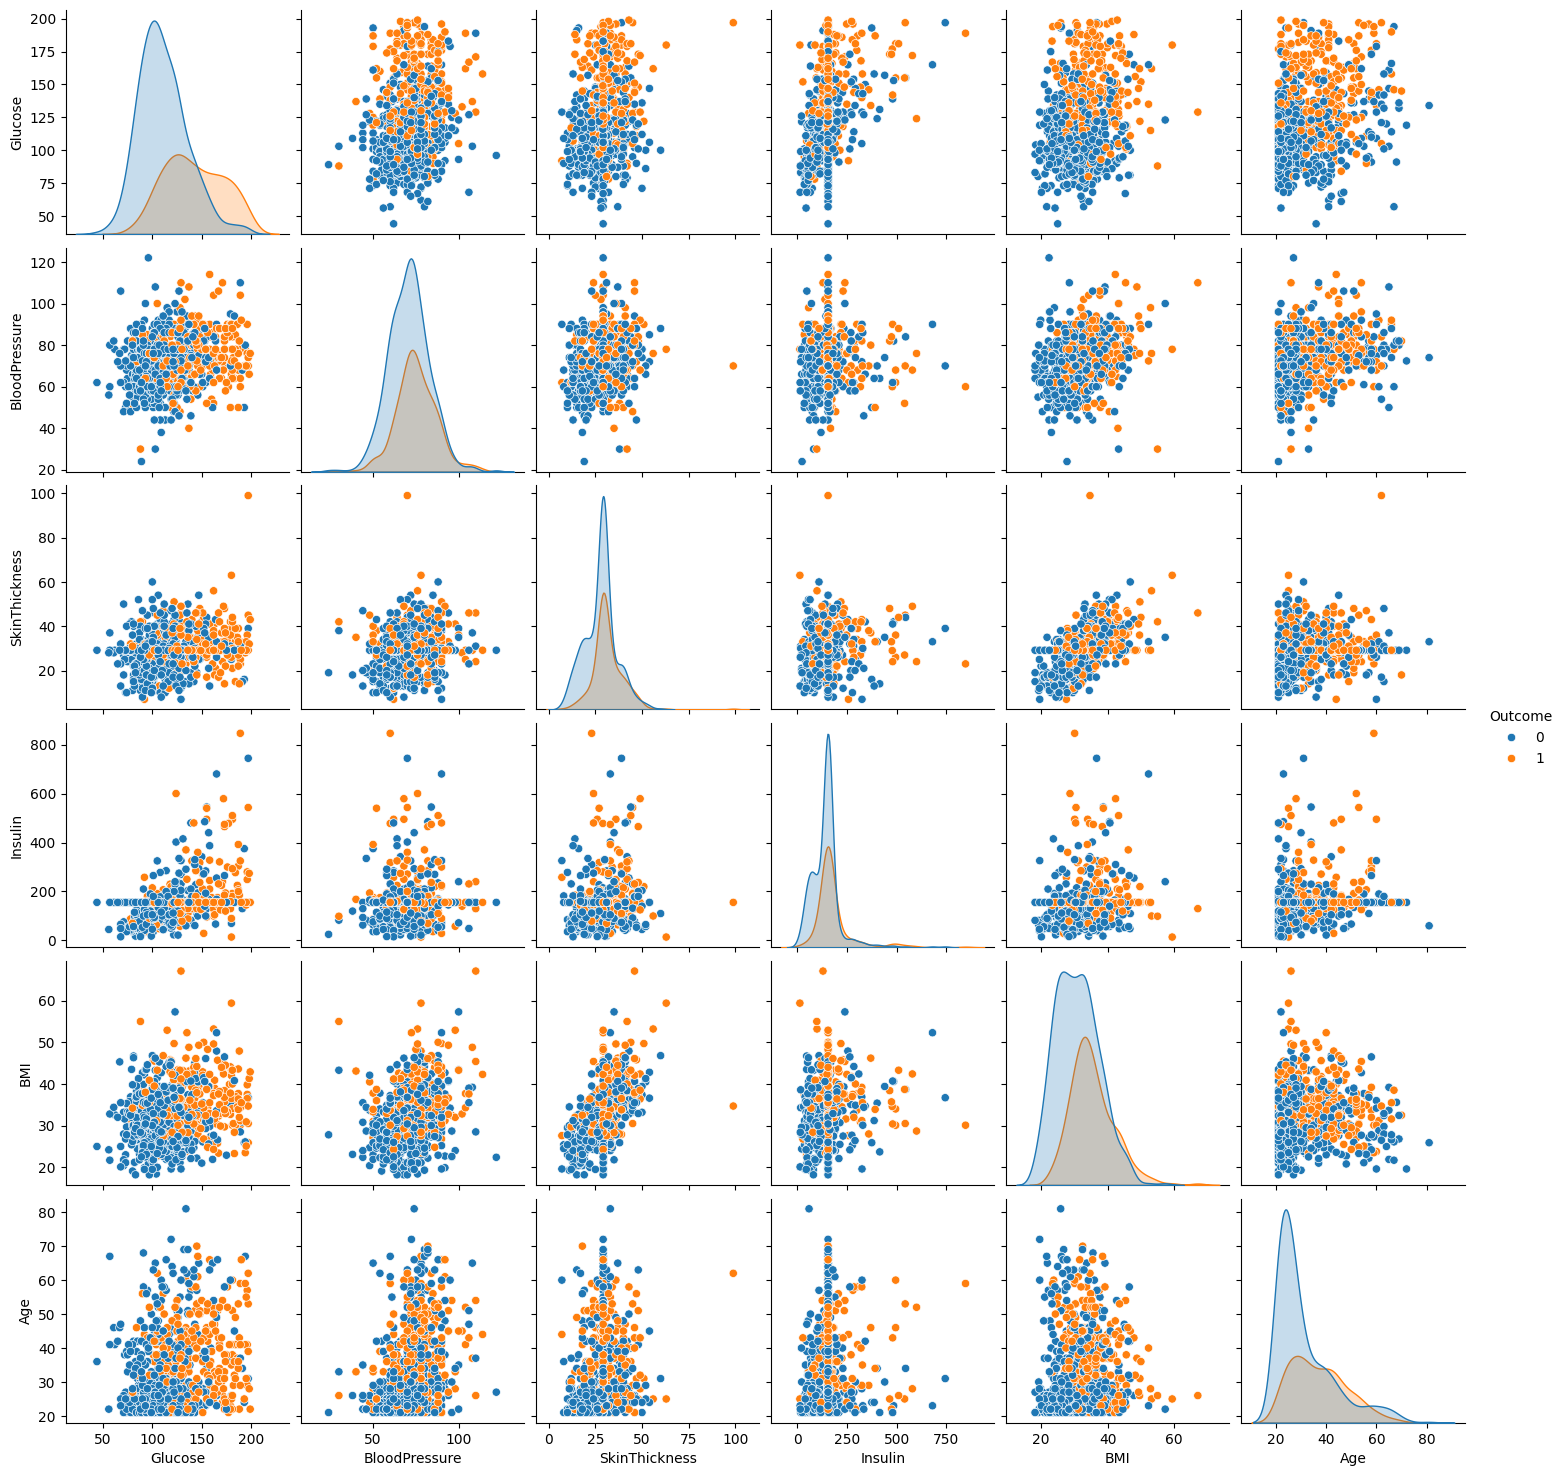

In [9]:
sns.pairplot(data_final,hue="Outcome")

In [10]:
x=data_final.iloc[:,:-1].values
y=data_final.iloc[:,-1].values

In [11]:
print(data_final.shape)

(768, 7)


In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test=train_test_split(x, y, test_size=.2, random_state=0)

In [13]:
print(x_test.shape)

(154, 6)


In [14]:
from sklearn.linear_model import LogisticRegression
logm=LogisticRegression()
logm.fit(x_train,y_train)

LogisticRegression()

In [15]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test,logm.predict(x_test))
print(ac)

0.7922077922077922


In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
ac=accuracy_score(y_test,logm.predict(x_test))
print(ac)

0.7922077922077922


<Axes: >

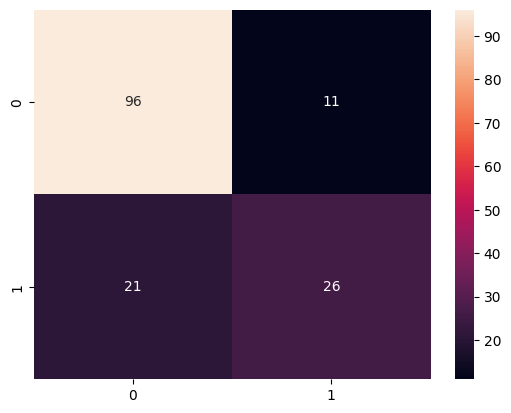

In [17]:
sns.heatmap(confusion_matrix(y_test, logm.predict(x_test)), annot=True)

In [18]:
logm_cr=classification_report(y_test, logm.predict(x_test))
print(logm_cr)

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       107
           1       0.70      0.55      0.62        47

    accuracy                           0.79       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.78      0.79      0.78       154



In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier (n_neighbors=7)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

**KNN**

In [20]:
acknn=accuracy_score(y_test,knn.predict(x_test))
print(acknn)

0.7662337662337663


<Axes: >

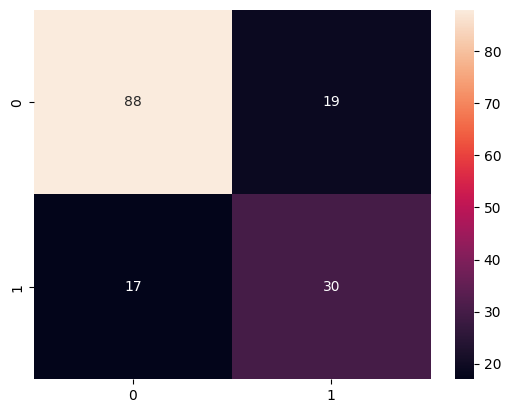

In [21]:
sns.heatmap(confusion_matrix(y_test,knn.predict(x_test)), annot=True)

In [22]:
crknn=classification_report(y_test,knn.predict(x_test))
print(crknn)

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       107
           1       0.61      0.64      0.62        47

    accuracy                           0.77       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.77      0.77      0.77       154



**NAIVE BAYES**

In [23]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [24]:
acnb=accuracy_score(y_test,nb.predict(x_test))
print(acnb)

0.7792207792207793


<Axes: >

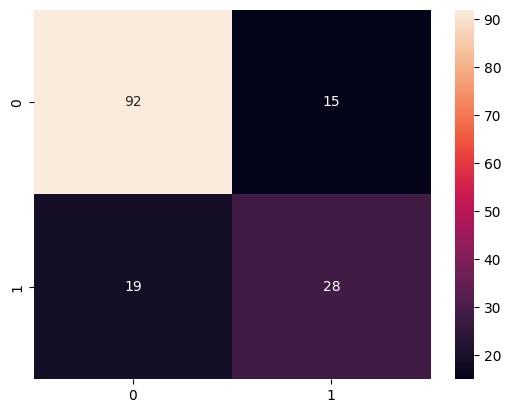

In [25]:
sns.heatmap(confusion_matrix(y_test,nb.predict(x_test)), annot=True)

In [26]:
crnb=classification_report(y_test, nb.predict(x_test))
print(crnb)

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       107
           1       0.65      0.60      0.62        47

    accuracy                           0.78       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.77      0.78      0.78       154



**SVM**

In [27]:
from sklearn.svm import SVC
svmmodel=SVC(kernel="linear")
svmmodel.fit(x_train,y_train)

SVC(kernel='linear')

In [28]:
acsvm=accuracy_score(y_test,svmmodel.predict(x_test))
print(acsvm)

0.7922077922077922


<Axes: >

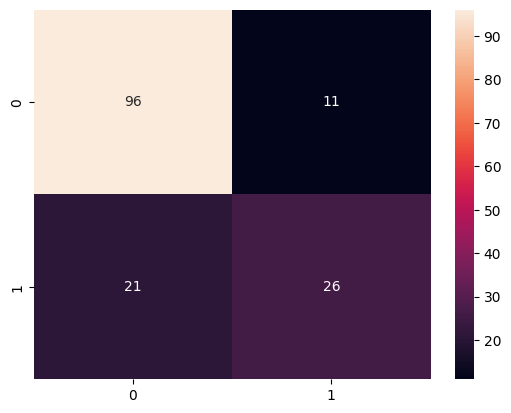

In [29]:
sns.heatmap(confusion_matrix(y_test,svmmodel.predict(x_test)), annot=True)

In [30]:
crsvm=classification_report(y_test, svmmodel.predict(x_test))
print(crsvm)

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       107
           1       0.70      0.55      0.62        47

    accuracy                           0.79       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.78      0.79      0.78       154



**DT**

In [31]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [32]:
dtac=accuracy_score(y_test,dt.predict(x_test))
print(dtac)

0.7012987012987013


<Axes: >

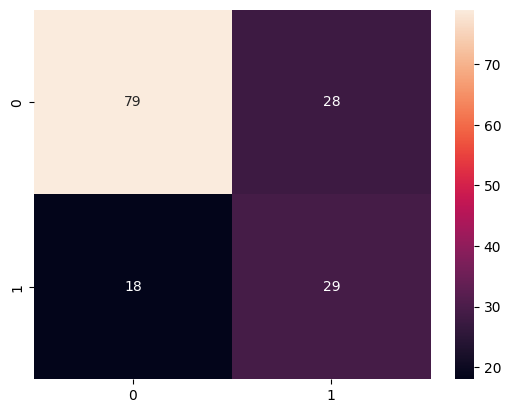

In [33]:
sns.heatmap(confusion_matrix(y_test,dt.predict(x_test)), annot=True)

In [34]:
dtcr=classification_report(y_test,dt.predict(x_test))
print(dtcr)

              precision    recall  f1-score   support

           0       0.81      0.74      0.77       107
           1       0.51      0.62      0.56        47

    accuracy                           0.70       154
   macro avg       0.66      0.68      0.67       154
weighted avg       0.72      0.70      0.71       154



In [35]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)

RandomForestClassifier()

In [36]:
acrf=accuracy_score(y_test,rf.predict(x_test))
print(acrf)

0.7857142857142857


<Axes: >

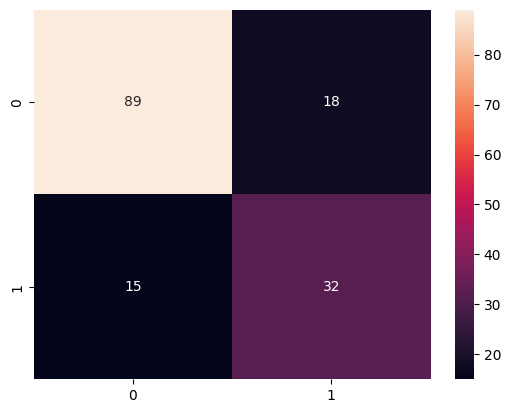

In [37]:
sns.heatmap(confusion_matrix(y_test,rf.predict(x_test)),annot=True)

In [38]:
crrf=classification_report(y_test,rf.predict(x_test))
print(crrf)

              precision    recall  f1-score   support

           0       0.86      0.83      0.84       107
           1       0.64      0.68      0.66        47

    accuracy                           0.79       154
   macro avg       0.75      0.76      0.75       154
weighted avg       0.79      0.79      0.79       154

